# Pre Processing

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split

In [35]:
df = pd.read_csv('Train.csv')

## Handle Outliers

In [36]:
from scipy import stats

In [37]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['Prior_purchases','Discount_offered']:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
dfz = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(dfz)}')

Jumlah baris sebelum memfilter outlier: 10999
Jumlah baris setelah memfilter outlier: 10642


## Handle Outliers dengan Log Transformation

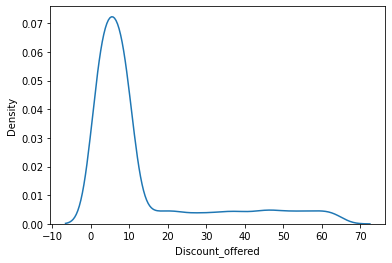

In [38]:
sns.kdeplot(df['Discount_offered'])

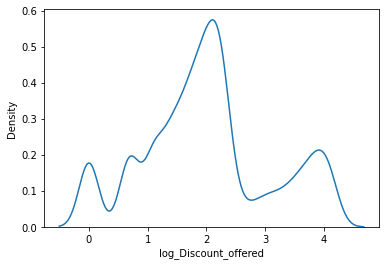

In [39]:
df['log_Discount_offered'] = np.log(df['Discount_offered'])
sns.kdeplot(df['log_Discount_offered'])

## Encoding

In [40]:
# Label Encoding
map_gender = {'M' : 0, 'F':1}
df['enc_gender'] = df['Gender'].map(map_gender)

map_Pi = {'low' : 0, 'medium':1, 'high':2}
df['enc_Product_importance'] = df['Product_importance'].map(map_Pi)


In [41]:
# One Hot Encoding
ohe_ship = pd.get_dummies(df['Mode_of_Shipment'], prefix='mode')
ohe_warehouse = pd.get_dummies(df['Warehouse_block'], prefix='Warehouse')
df_final = df.join(ohe_ship)
df_final = df_final.join(ohe_warehouse)

In [42]:
df_final

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,enc_gender,enc_Product_importance,mode_Flight,mode_Road,mode_Ship,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F
0,1,D,Flight,4,2,177,3,low,F,44,...,1,0,1,0,0,0,0,0,1,0
1,2,F,Flight,4,5,216,2,low,M,59,...,0,0,1,0,0,0,0,0,0,1
2,3,A,Flight,2,2,183,4,low,M,48,...,0,0,1,0,0,1,0,0,0,0
3,4,B,Flight,3,3,176,4,medium,M,10,...,0,1,1,0,0,0,1,0,0,0
4,5,C,Flight,2,2,184,3,medium,F,46,...,1,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,...,1,1,0,0,1,1,0,0,0,0
10995,10996,B,Ship,4,1,232,5,medium,F,6,...,1,1,0,0,1,0,1,0,0,0
10996,10997,C,Ship,5,4,242,5,low,F,4,...,1,0,0,0,1,0,0,1,0,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,...,0,1,0,0,1,0,0,0,0,1


## Standarisasi

In [43]:
from sklearn.preprocessing import StandardScaler as ss
df_final['std_Customer_care_calls'] = ss().fit_transform(df_final['Customer_care_calls'].values.reshape(len(df_final),1))
df_final['std_Customer_rating'] = ss().fit_transform(df_final['Customer_rating'].values.reshape(len(df_final),1))
df_final['std_Cost_of_the_Product'] = ss().fit_transform(df_final['Cost_of_the_Product'].values.reshape(len(df_final),1))
df_final['std_Prior_purchases'] = ss().fit_transform(df_final['Prior_purchases'].values.reshape(len(df_final),1))
df_final['std_Discount_offered'] = ss().fit_transform(df_final['Discount_offered'].values.reshape(len(df_final),1))
df_final['std_Weight_in_gms'] = ss().fit_transform(df_final['Weight_in_gms'].values.reshape(len(df_final),1))

In [44]:
df_final

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,std_Customer_care_calls,std_Customer_rating,std_Cost_of_the_Product,std_Prior_purchases,std_Discount_offered,std_Weight_in_gms
0,1,D,Flight,4,2,177,3,low,F,44,...,0,0,1,0,-0.047711,-0.700755,-0.690722,-0.372735,1.889983,-1.468240
1,2,F,Flight,4,5,216,2,low,M,59,...,0,0,0,1,-0.047711,1.421578,0.120746,-1.029424,2.815636,-0.333893
2,3,A,Flight,2,2,183,4,low,M,48,...,0,0,0,0,-1.799887,-0.700755,-0.565881,0.283954,2.136824,-0.159002
3,4,B,Flight,3,3,176,4,medium,M,10,...,1,0,0,0,-0.923799,0.006689,-0.711529,0.283954,-0.208162,-1.502484
4,5,C,Flight,2,2,184,3,medium,F,46,...,0,1,0,0,-1.799887,-0.700755,-0.545074,-0.372735,2.013404,-0.703244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,...,0,0,0,0,-0.047711,-1.408199,0.869792,0.940643,-0.763553,-1.281730
10995,10996,B,Ship,4,1,232,5,medium,F,6,...,1,0,0,0,-0.047711,-1.408199,0.453655,0.940643,-0.455002,-1.459679
10996,10997,C,Ship,5,4,242,5,low,F,4,...,0,1,0,0,0.828377,0.714133,0.661724,0.940643,-0.578423,-1.515937
10997,10998,F,Ship,5,2,223,6,medium,M,2,...,0,0,0,1,0.828377,-0.700755,0.266394,1.597332,-0.701843,-1.482304


In [45]:
df_final.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'log_Discount_offered', 'enc_gender',
       'enc_Product_importance', 'mode_Flight', 'mode_Road', 'mode_Ship',
       'Warehouse_A', 'Warehouse_B', 'Warehouse_C', 'Warehouse_D',
       'Warehouse_F', 'std_Customer_care_calls', 'std_Customer_rating',
       'std_Cost_of_the_Product', 'std_Prior_purchases',
       'std_Discount_offered', 'std_Weight_in_gms'],
      dtype='object')

In [46]:
df_end = df_final.drop(columns = ['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'])

In [47]:
df_end

,Reached.on.Time_Y.N,log_Discount_offered,enc_gender,enc_Product_importance,mode_Flight,mode_Road,mode_Ship,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,std_Customer_care_calls,std_Customer_rating,std_Cost_of_the_Product,std_Prior_purchases,std_Discount_offered,std_Weight_in_gms
0,1,3.784190,1,0,1,0,0,0,0,0,1,0,-0.047711,-0.700755,-0.690722,-0.372735,1.889983,-1.468240
1,1,4.077537,0,0,1,0,0,0,0,0,0,1,-0.047711,1.421578,0.120746,-1.029424,2.815636,-0.333893
2,1,3.871201,0,0,1,0,0,1,0,0,0,0,-1.799887,-0.700755,-0.565881,0.283954,2.136824,-0.159002
3,1,2.302585,0,1,1,0,0,0,1,0,0,0,-0.923799,0.006689,-0.711529,0.283954,-0.208162,-1.502484
4,1,3.828641,1,1,1,0,0,0,0,1,0,0,-1.799887,-0.700755,-0.545074,-0.372735,2.013404,-0.703244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,1,0.000000,1,1,0,0,1,1,0,0,0,0,-0.047711,-1.408199,0.869792,0.940643,-0.763553,-1.281730
10995,0,1.791759,1,1,0,0,1,0,1,0,0,0,-0.047711,-1.408199,0.453655,0.940643,-0.455002,-1.459679
10996,0,1.386294,1,0,0,0,1,0,0,1,0,0,0.828377,0.714133,0.661724,0.940643,-0.578423,-1.515937
10997,0,0.693147,0,1,0,0,1,0,0,0,0,1,0.828377,-0.700755,0.266394,1.597332,-0.701843,-1.482304


In [48]:
df_end.columns

Index(['Reached.on.Time_Y.N', 'log_Discount_offered', 'enc_gender',
       'enc_Product_importance', 'mode_Flight', 'mode_Road', 'mode_Ship',
       'Warehouse_A', 'Warehouse_B', 'Warehouse_C', 'Warehouse_D',
       'Warehouse_F', 'std_Customer_care_calls', 'std_Customer_rating',
       'std_Cost_of_the_Product', 'std_Prior_purchases',
       'std_Discount_offered', 'std_Weight_in_gms'],
      dtype='object')

In [49]:
# Memisahkan Features vs Target
X = df_end[['enc_gender',
       'enc_Product_importance', 'mode_Flight', 'mode_Road', 'mode_Ship',
       'Warehouse_A', 'Warehouse_B', 'Warehouse_C', 'Warehouse_D',
       'Warehouse_F', 'std_Customer_care_calls', 'std_Customer_rating',
       'std_Cost_of_the_Product', 'std_Prior_purchases',
       'std_Discount_offered', 'std_Weight_in_gms']]
y = df_end[['Reached.on.Time_Y.N']]



In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=44)

# Cek Akurasi Beberapa Model

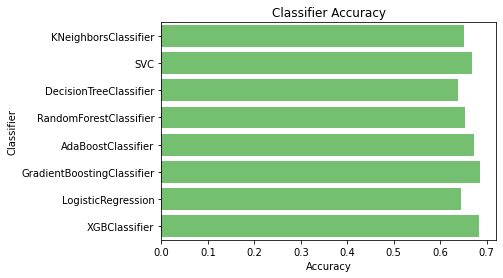

In [51]:
#Finding The Best Classification model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

classifiers = [
    KNeighborsClassifier(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    XGBClassifier()]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)


acc_dict = {}



for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf]
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="g")

In [52]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.651364
0,SVC,0.668636
0,DecisionTreeClassifier,0.638182
0,RandomForestClassifier,0.653182
0,AdaBoostClassifier,0.673182
0,GradientBoostingClassifier,0.686364
0,LogisticRegression,0.644091
0,XGBClassifier,0.683182


# Model 1 : Decision Tree

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [54]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier() # inisiasi object dengan nama knn
dt.fit(X_train, y_train) # fit model KNN dari data train
y_pred=dt.predict(X_test)
eval_classification(dt)

Accuracy (Test Set): 0.65
Precision (Test Set): 0.70
Recall (Test Set): 0.71
F1-Score (Test Set): 0.71
roc_auc (test-proba): 0.63
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.6166891705863607


## Confusion Matrix Before Hyperparameter Tuning

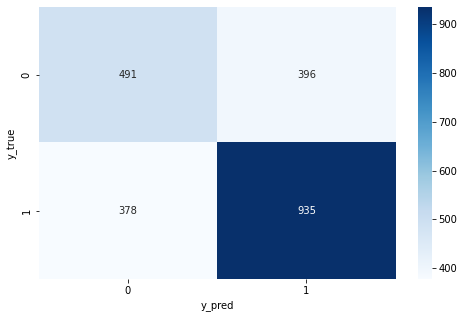

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) 

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax,cmap='Blues')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Pada confusion matrix di atas : 

- 0 artinya ontime

- 1 artinya terlambat

Pada permasalahan pengiriman barang e-commerce, barang yang diprediksi on time (0) tetapi sebenarnya terlambat (1) harus diperkecil. Jika barang yang diprediksi on time padahal sebenarnya terlambat akan sangat merugikan pelanggan. 

Dari confusion matrix, dapat dilihat bahwa terdapat **378 barang yang sebenarnya terlambat, tetapi diprediksi on time**.

Barang yang sebenarnya terlambat, tetapi diprediksi on time termasuk dalam **False Negative**.

Selanjutnya, akan dilakukan hyperparameter untuk memperkecil nilai False Negative dengan cara menaikkan **Recall** atau True Positive Rate.


## Hyperparameter Tuning
<b>Hyperparameter yang biasa di tuning pada Decision Tree:</b> (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- criterion: cara menghitung impurity pada feature (gini, entropy). melihat feature mana yang menjadi root/node
- max_depth: maksimal kedalaman tree untuk mencegah overfitting
- min_sample_split: berapa jumlah sample yg dibutuhkan pada node untuk membuat leaf baru (agar tidak terlalu sedikit sehingga mengakibatkan overfit)
- min_sample_leaf: berapa jumlah sample yg dibutuhkan pada leaf agar leaf terbentuk (agar tidak terlalu sedikit sehingga mengakibatkan overfit)
- ccp_alpha: jika cost/error dari sebuah leaf/subtree lebih besar daripada ccp_alpha, subtree tersebut akan kita hapus/prune sehingga meminimalisir error/variance dari model
- splitter: bagaimana kita memilih feature untuk dilakukan split, dan apakah ada jumlah batasan feature yang akan di split tersebut

In [56]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model_dt = GridSearchCV(dt, hyperparameters, cv=5, scoring='recall')
model_dt.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model_dt.predict(X_test)#Check performa dari model
eval_classification(model_dt)

Accuracy (Test Set): 0.60
Precision (Test Set): 0.60
Recall (Test Set): 1.00
F1-Score (Test Set): 0.75
roc_auc (test-proba): 0.49
roc_auc (train-proba): 0.50
roc_auc (crossval train): 0.5027422923079663
roc_auc (crossval test): 0.49800491394235885


In [57]:
model_dt.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [58]:
model_dt.best_score_

1.0

In [60]:
dt_tuning=DecisionTreeClassifier(criterion='gini',max_depth=1,max_features='auto',min_samples_leaf=1,min_samples_split=2,
                                 splitter='best')
dt_tuning.fit(X_train,y_train)
eval_classification(dt_tuning)


Accuracy (Test Set): 0.60
Precision (Test Set): 0.60
Recall (Test Set): 1.00
F1-Score (Test Set): 0.75
roc_auc (test-proba): 0.49
roc_auc (train-proba): 0.50
roc_auc (crossval train): 0.59723091549937
roc_auc (crossval test): 0.6115205696112043


## Confusion Matrix After Tuning

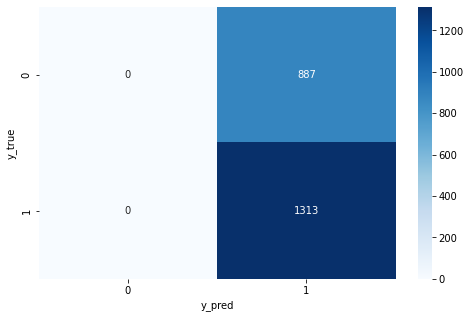

In [61]:
from sklearn.metrics import confusion_matrix
y_pred=dt_tuning.predict(X_test)
confusion_matrix(y_test, y_pred) 

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax,cmap='Blues')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [68]:
recall_score(y_test,y_pred)

1.0

Dari confusion matrix di atas diperoleh bahwa score recall bernilai 1, yang artinya tidak ada barang terlambat yang diprediksi datang on time.

## Feature Importance using Explanable AI : Shap Value

In [64]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Train the model

In [65]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Draw the plots

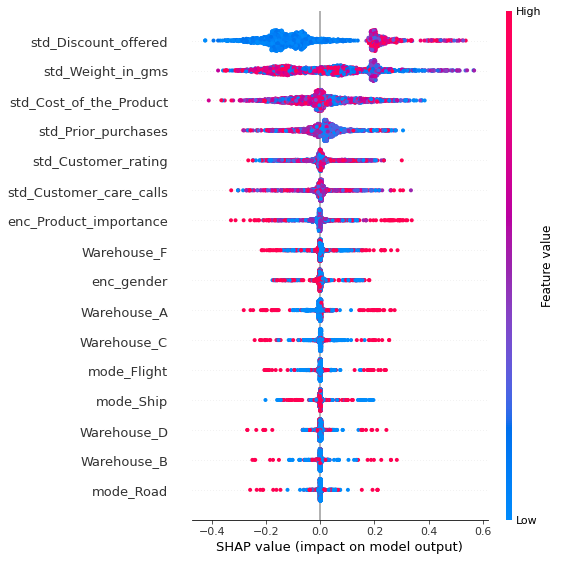

In [66]:
import shap
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test) # Summary shap value terhadap label positive

# Model 2 : KNN

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:

from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
y_pred=knn.predict(X_test)
eval_classification(knn)

Accuracy (Test Set): 0.65
Precision (Test Set): 0.72
Recall (Test Set): 0.68
F1-Score (Test Set): 0.70
roc_auc (test-proba): 0.72
roc_auc (train-proba): 0.86
roc_auc (crossval train): 0.863433603382061
roc_auc (crossval test): 0.695700765825648


## Confusion Matrix Before Hyperparameter Tuning

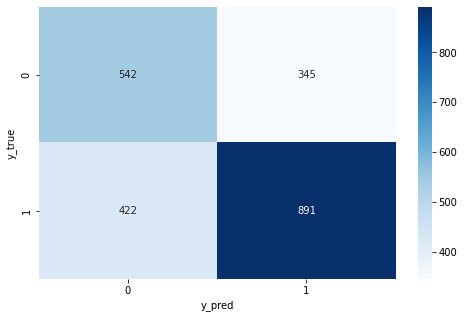

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) 

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax,cmap='Blues')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Pada confusion matrix di atas : 

- 0 artinya ontime

- 1 artinya terlambat

Pada permasalahan pengiriman barang e-commerce, barang yang diprediksi on time (0) tetapi sebenarnya terlambat (1) harus diperkecil. Jika barang yang diprediksi on time padahal sebenarnya terlambat akan sangat merugikan pelanggan. 

Dari confusion matrix, dapat dilihat bahwa terdapat **422 barang yang sebenarnya terlambat, tetapi diprediksi on time**.

Barang yang sebenarnya terlambat, tetapi diprediksi on time termasuk dalam **False Negative**.

Selanjutnya, akan dilakukan hyperparameter untuk memperkecil nilai False Negative dengan cara menaikkan **Recall** atau True Positive Rate.


## Hyperparameter Tuning



<b>Hyperparameter yang biasa di tuning pada kNN:

</b> (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

- n_neighbors: jumlah tetangga yang kita lihat
- weights: jika menggunakan pembobotan pada kNN. pembobotan bisa berdasarkan jarak (i.e. semakin dekat jaraknya semakin besar bobotnya)
- algorithm: berbagai macam algoritma yang kita gunakan untuk menghitung jarak dan membandingkan jarak satu dengan yang lainnya (brute, kd_tree, ball_tree, etc.)
    - leaf_size: digunakan jika kita menggunakan algoritma kd_tree saja. membandingkan jarak dengan pendekatan tree based algorithm
- p: cara menghitung jarak antar data point. 1 untuk manhattan distance, 2 untuk euclidean distance, >2 untuk minkowski distance

In [ ]:
from sklearn.model_selection import GridSearchCV

n_neighbors = list(range(1,100))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn=KNeighborsClassifier()
gs_knn = GridSearchCV(knn, hyperparameters, scoring='recall', cv=5)
gs_knn.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2]},
             scoring='recall')

In [ ]:
gs_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}

In [ ]:
gs_knn.best_score_

0.6799999999999999

In [ ]:
knn_tuning=KNeighborsClassifier(algorithm='auto',n_neighbors=1,p=2)
knn_tuning.fit(X_train,y_train)
eval_classification(knn_tuning)


Accuracy (Test Set): 0.63
Precision (Test Set): 0.69
Recall (Test Set): 0.68
F1-Score (Test Set): 0.69
roc_auc (test-proba): 0.61
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.6039814656032699


## Confusion Matrix After Tuning

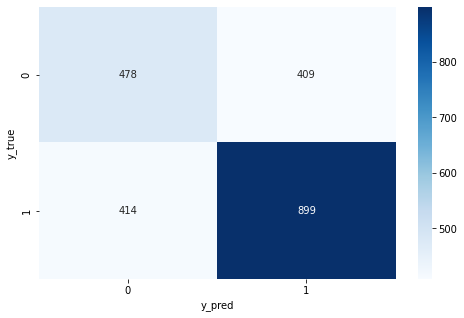

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=knn_tuning.predict(X_test)
confusion_matrix(y_test, y_pred) 

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax,cmap='Blues')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Learning Curve

param value: 1; train: 1.0; test: 0.6117933491380532
param value: 2; train: 0.9299598277180696; test: 0.6725997333060858
param value: 3; train: 0.8950014088475627; test: 0.7063842538967278
param value: 4; train: 0.8737321311167465; test: 0.7222025688823327
param value: 5; train: 0.8601334514081767; test: 0.7246891934011717
param value: 6; train: 0.8473520642971192; test: 0.7250742939179877
param value: 7; train: 0.8379849722926646; test: 0.7270483097221352
param value: 8; train: 0.8309041312777575; test: 0.7302553340929443
param value: 9; train: 0.8239519918421018; test: 0.7294653843148602
param value: 10; train: 0.8169322545586282; test: 0.7301050719068959
param value: 11; train: 0.8139280280159401; test: 0.7289029744185068
param value: 12; train: 0.8116998752163588; test: 0.7265060778907655
param value: 13; train: 0.8087680500207972; test: 0.7303029886719485
param value: 14; train: 0.8056674851400126; test: 0.7318236419947606
param value: 15; train: 0.8047894645037503; test: 0.732644

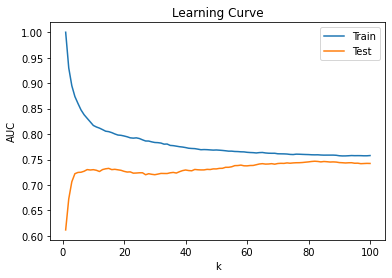

In [ ]:
# Analyzing Learning Curve
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)

param value: 1; train: 0.6846915460776847; test: 0.6846915460776847
param value: 2; train: 0.6846915460776847; test: 0.6846915460776847
param value: 3; train: 0.6846915460776847; test: 0.6846915460776847
param value: 4; train: 0.6846915460776847; test: 0.6846915460776847
param value: 5; train: 0.6846915460776847; test: 0.6846915460776847
param value: 6; train: 0.6846915460776847; test: 0.6846915460776847
param value: 7; train: 0.6846915460776847; test: 0.6846915460776847
param value: 8; train: 0.6846915460776847; test: 0.6846915460776847
param value: 9; train: 0.6846915460776847; test: 0.6846915460776847
param value: 10; train: 0.6846915460776847; test: 0.6846915460776847
param value: 11; train: 0.6846915460776847; test: 0.6846915460776847
param value: 12; train: 0.6846915460776847; test: 0.6846915460776847
param value: 13; train: 0.6846915460776847; test: 0.6846915460776847
param value: 14; train: 0.6846915460776847; test: 0.6846915460776847
param value: 15; train: 0.6846915460776847;

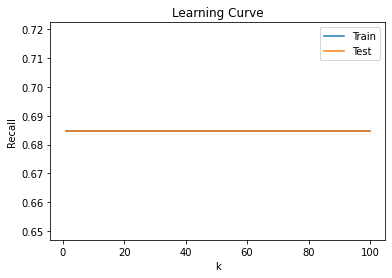

In [ ]:
# Analyzing Learning Curve
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_recall = recall_score(y_test, y_pred)
        train_scores.append(train_recall)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('Recall')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)

# Model 3 : Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.65
Precision (Test Set): 0.72
Recall (Test Set): 0.66
F1-Score (Test Set): 0.69
roc_auc (test-proba): 0.73
roc_auc (train-proba): 0.73
roc_auc (crossval train): 0.7278970667693974
roc_auc (crossval test): 0.7015005885601309


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.64
Precision (Test Set): 0.69
Recall (Test Set): 0.69
F1-Score (Test Set): 0.69
roc_auc (test-proba): 0.72
roc_auc (train-proba): 0.73
roc_auc (crossval train): 0.7274587254709894
roc_auc (crossval test): 0.7038799192146599


In [ ]:
X.columns

Index(['Log_Discount_offered', 'Warehouse_block_A', 'Warehouse_block_B',
       'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F',
       'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
       'Mode_of_Shipment_Ship', 'std_Customer_care_calls',
       'std_Customer_rating', 'std_Cost_of_the_Product', 'std_Prior_purchases',
       'std_Discount_offered', 'std_Weight_in_gms'],
      dtype='object')

## Best Estimator

In [ ]:
rs.best_estimator_.coef_

array([[-0.18974561, -0.02339061,  0.01025304, -0.00312225,  0.01344722,
         0.00243403,  0.01651514, -0.00281189, -0.01079058, -0.11909493,
         0.04715036, -0.09225915, -0.11971491,  1.69934928, -0.38729554]])

## Learning Curve

param value: 0.0001; train: 0.7192023088363383; test: 0.71661295552352
param value: 0.0006040404040404041; train: 0.7212386132102553; test: 0.7179358175942177
param value: 0.0011080808080808082; train: 0.7221717351435689; test: 0.71860447946367
param value: 0.0016121212121212123; train: 0.722778281946705; test: 0.7191635371109241
param value: 0.002116161616161616; train: 0.7232411581520606; test: 0.7196285939148346
param value: 0.0026202020202020205; train: 0.7236535004881431; test: 0.7200004110158331
param value: 0.0031242424242424243; train: 0.7239844271459523; test: 0.7202687130180893
param value: 0.003628282828282828; train: 0.724291630959575; test: 0.7205556629609277
param value: 0.004132323232323233; train: 0.7245796038285021; test: 0.7207938999161223
param value: 0.004636363636363637; train: 0.724809462747765; test: 0.7210249060372137
param value: 0.0051404040404040416; train: 0.7250514638328396; test: 0.721268090405216
param value: 0.005644444444444445; train: 0.725277673083766

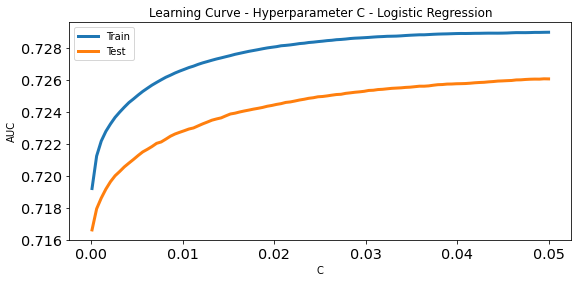

In [ ]:
# learning curve
import numpy as np
param_values = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
draw_learning_curve(param_values)